In [41]:
import medleydb as mdb
from medleydb import MEDLEYDB_PATH
print(MEDLEYDB_PATH)

/home/carlnys/data/medleydb_audio


In [4]:
m_gen = mdb.load_all_multitracks()
num_tracks = 0
for track in m_gen:
    num_tracks += 1
    print(track.track_id)

AClassicEducation_NightOwl
AimeeNorwich_Child
AimeeNorwich_Flying
AlexanderRoss_GoodbyeBolero
AlexanderRoss_VelvetCurtain
AmarLal_Rest
AmarLal_SpringDay1
Auctioneer_OurFutureFaces
AvaLuna_Waterduct
BigTroubles_Phantom
BrandonWebster_DontHearAThing
BrandonWebster_YesSirICanFly
CelestialShore_DieForUs
ChrisJacoby_BoothShotLincoln
ChrisJacoby_PigsFoot
ClaraBerryAndWooldog_AirTraffic
ClaraBerryAndWooldog_Boys
ClaraBerryAndWooldog_Stella
ClaraBerryAndWooldog_TheBadGuys
ClaraBerryAndWooldog_WaltzForMyVictims
Creepoid_OldTree
CroqueMadame_Oil
CroqueMadame_Pilot
Debussy_LenfantProdigue
DreamersOfTheGhetto_HeavyLove
EthanHein_1930sSynthAndUprightBass
EthanHein_BluesForNofi
EthanHein_GirlOnABridge
EthanHein_HarmonicaFigure
FacesOnFilm_WaitingForGa
FamilyBand_Again
Grants_PunchDrunk
Handel_TornamiAVagheggiar
HeladoNegro_MitadDelMundo
HezekiahJones_BorrowedHeart
HopAlong_SisterCities
InvisibleFamiliars_DisturbingWildlife
JoelHelander_Definition
JoelHelander_ExcessiveResistancetoChange
JoelHelander

In [5]:
print(num_tracks)

122


In [37]:
example_track = mdb.MultiTrack('MusicDelta_Hendrix')
#dir(example_track)
for _, stems in example_track.stems.items():
    stem_dir = dir(stems)
    for thing in stem_dir:
        print(thing)
        #print(stems)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_duration
_pitch_annotation
_pitch_estimate_pyin
audio_path
component
duration
f0_type
instrument
mix_path
mixing_coefficient
pitch_annotation
pitch_estimate_pyin
pitch_path
pitch_pyin_path
ranking
raw_idx
stem_idx
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_duration
_pitch_annotation
_pitch_estimate_pyin
audio_path
component
duration
f0_type
instrument
mix_path
mixing_coefficient
pitch_annotation
pitch_estimate_pyin
pitch_path
pitch_pyin_path
ranking
raw_idx
stem_idx
__class__
__delattr__
__dict__
__dir__

In [6]:
track_ids = ['MusicDelta_Rock', 'MusicDelta_Reggae', 'MusicDelta_Disco']
dataset_subset = mdb.load_multitracks(track_ids)

In [7]:
def count_tracks_for_instrument(instrument):
    tracks = mdb.get_files_for_instrument(instrument)
    return sum(1 for track in tracks)

In [9]:
instruments = mdb.get_valid_instrument_labels()
num_instruments = sum(1 for instrument in instruments)
instrument_count = []
count = 0
for instrument in instruments:
    instrument_count.append(count_tracks_for_instrument(instrument))
    print("Instrument %s/%s" % (count, num_instruments), end="\r")
    count += 1

In [10]:
instrument_w_counts = list(zip(instruments, instrument_count))

In [11]:
sorted_list = sorted(instrument_w_counts, key=lambda x: x[1], reverse=True)

In [12]:
print(sorted_list)

[('drum set', 66), ('electric bass', 63), ('clean electric guitar', 56), ('synthesizer', 47), ('male singer', 44), ('piano', 43), ('fx/processed sound', 41), ('distorted electric guitar', 34), ('vocalists', 33), ('female singer', 32), ('violin', 27), ('acoustic guitar', 26), ('auxiliary percussion', 18), ('drum machine', 18), ('violin section', 18), ('double bass', 17), ('tabla', 16), ('cello', 13), ('flute', 12), ('tack piano', 10), ('clarinet', 9), ('brass section', 9), ('mandolin', 9), ('trumpet', 8), ('viola', 8), ('vibraphone', 8), ('cymbal', 7), ('timpani', 7), ('male rapper', 6), ('yangqin', 6), ('erhu', 6), ('Main System', 6), ('french horn', 6), ('string section', 6), ('bassoon', 6), ('accordion', 5), ('trumpet section', 5), ('cello section', 5), ('oboe', 5), ('dizi', 5), ('claps', 5), ('guzheng', 5), ('horn section', 4), ('trombone', 4), ('lap steel guitar', 4), ('piccolo', 4), ('viola section', 4), ('french horn section', 3), ('sampler', 3), ('zhongruan', 3), ('tenor saxopho

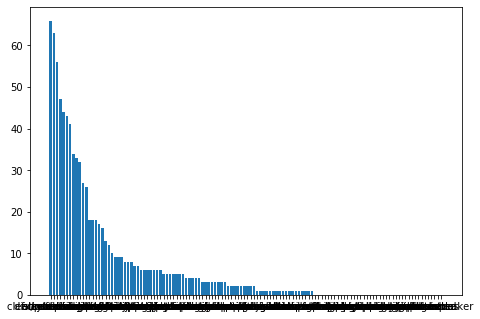

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
instruments = [t[0] for t in sorted_list]
counts = [t[1] for t in sorted_list]
ax.bar(instruments,counts)
plt.show()

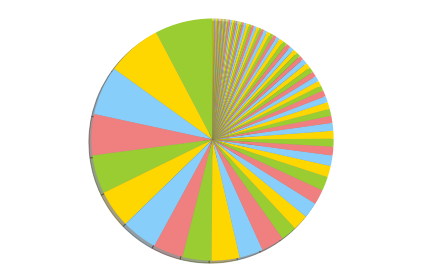

In [15]:
labels = ['Cookies', 'Jellybean', 'Milkshake', 'Cheesecake']
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(counts, colors=colors, shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
import medleydb as mdb
import librosa
import os
instruments = ['male singer', 'female singer']
back_instruments = ['acoustic guitar']

mixtrack=[] 
track_name = ''
mtrack_generator = mdb.load_all_multitracks()
for mtrack in mtrack_generator:
    mixtrack = []
    track = mdb.MultiTrack(mtrack.track_id)
    mixtrack.append(track.track_id)
   
    #print(track.track_id)
    #for key, stem in track.stems.items():
    #    #print(stem.instrument[0])
    #    #print(stem.audio_path)
    #    if stem.instrument[0] in instruments:
    #        if stem.ranking == 1:
    #            mixtrack.append(stem.audio_path)
    #
    #    if stem.instrument[0] in back_instruments:
    #        mixtrack.append(stem.audio_path)
            
    for key, stem in track.stems.items():
        #print(stem.instrument[0])
        #print(stem.audio_path)
        if stem.instrument[0] in instruments:
            if stem.ranking == 1:
                mixtrack.append(stem.audio_path)

        if stem.instrument[0] in back_instruments:
            mixtrack.append(stem.audio_path)

    if len(mixtrack) > 2:
        #print(mixtrack)
        result = None
        sr_out = 0
        track_name = mixtrack.pop(0)
        for mt in mixtrack:
            print(mt)
            y, sr = librosa.load(mt, sr=None)
            if result is None:
                result = y
                sr_out = sr
            else:
                result = result + y

        librosa.output.write_wav(track_name + 'test2.wav', result, sr_out)
        print(track_name)
        print("saving...")

/home/carlnys/data/medleydb_audio/Audio/AimeeNorwich_Child/AimeeNorwich_Child_STEMS/AimeeNorwich_Child_STEM_04.wav
/home/carlnys/data/medleydb_audio/Audio/AimeeNorwich_Child/AimeeNorwich_Child_STEMS/AimeeNorwich_Child_STEM_07.wav
AimeeNorwich_Child
saving...
/home/carlnys/data/medleydb_audio/Audio/AlexanderRoss_GoodbyeBolero/AlexanderRoss_GoodbyeBolero_STEMS/AlexanderRoss_GoodbyeBolero_STEM_01.wav
/home/carlnys/data/medleydb_audio/Audio/AlexanderRoss_GoodbyeBolero/AlexanderRoss_GoodbyeBolero_STEMS/AlexanderRoss_GoodbyeBolero_STEM_06.wav
AlexanderRoss_GoodbyeBolero
saving...
/home/carlnys/data/medleydb_audio/Audio/AlexanderRoss_VelvetCurtain/AlexanderRoss_VelvetCurtain_STEMS/AlexanderRoss_VelvetCurtain_STEM_01.wav
/home/carlnys/data/medleydb_audio/Audio/AlexanderRoss_VelvetCurtain/AlexanderRoss_VelvetCurtain_STEMS/AlexanderRoss_VelvetCurtain_STEM_06.wav
AlexanderRoss_VelvetCurtain
saving...
/home/carlnys/data/medleydb_audio/Audio/FacesOnFilm_WaitingForGa/FacesOnFilm_WaitingForGa_STEMS/F

In [2]:
import os 
print(os.environ['MEDLEYDB_PATH'])
import medleydb as mdb
from medleydb import AUDIO_PATH
print(AUDIO_PATH)

/home/carlnys/data/medleydb_audio
/home/carlnys/data/medleydb_audio/Audio


In [15]:
import IPython.display as ipd
def play_audio(array, sample_rate):
    ipd.display(ipd.Audio(array, rate=sample_rate, autoplay=True))

In [21]:
cc
y2, sr2 = librosa.load('/home/carlnys/data/medleydb_audio/Audio/AlexanderRoss_GoodbyeBolero/AlexanderRoss_GoodbyeBolero_MIX.wav')

In [ ]:
play_audio(y, sr)

In [ ]:
play_audio(y2, sr2)